<h1 style="color:red">Emotion Prediction System – Machine Learning Cycle</h1>

# Machine Learning Cycle

### Four phases of a Machine Learning Cycle are

### Training Phase

    Build the Model using Training Data

### Testing Phase

     Evaluate the performance of Model using Testing Data

### Application Phase

     Deploy the Model in the Real-world, to predict Real-time unseen Data

### Feedback Phase

    Take Feedback from the Users and Domain Experts to improve the Model


# Step 1: Import Libraries

In [148]:
import re
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Sample Data

In [154]:
data = pd.read_csv("emotion_prediction_dataset.csv")

print("\n\Emotion Prediction Data:")
print("============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(f'Sample data count = {len(data)}\n')
print(data.head())
print(data.tail())


\Emotion Prediction Data:

Sample data count = 100

                                               Tweet Emotion
0             False alarm // matoma &amp; Becky hill   anger
1  I'm tired of everybody telling me to chill out...   anger
2  Im so serious about putting words in my mouth ...   anger
3  Can someone make me a priority list of which t...   anger
4  @TeaPartyOrg Hes right when the Civil war star...   anger
                                                Tweet Emotion
95  Riggs dumb ass hell lolol #hilarious #LethalWe...   trust
96                        American Schools are lively   trust
97  Accept the challenges so that you can feel the...   trust
98  Have any of you ever stayed in hostels oversea...   trust
99  @ProSyndicate thanks for replying, I'm ironing...   trust


## Step 2.1: View Columns In Dataset

In [155]:
data.columns

Index(['Tweet', 'Emotion'], dtype='object')

## Step 2.2: Keeping Required Column In Dataset

# Step 3: Understand and Pre-process Sample Data

## Definition of Pre-processing Sample Data

Pre-processing sample data involves cleaning and transforming raw data into a format that can be effectively used for analysis. This step is crucial in natural language processing (NLP) as it helps in improving the performance of machine learning models by removing noise and ensuring consistency.

## Impact of Pre-processing Sample Data

1. **Improves Data Quality**: Removes irrelevant and redundant information, leading to cleaner and more meaningful data.
2. **Enhances Model Accuracy**: By reducing noise and standardizing text, pre-processing helps in achieving better model performance.
3. **Facilitates Efficient Data Analysis**: Simplifies the data, making it easier to analyze and interpret.
4. **Reduces Complexity**: Helps in reducing the complexity of data by normalizing text and handling missing values.

Common pre-processing steps include:
- Removing punctuation and special characters
- Converting text to lowercase
- Removing stopwords
- Stemming and lemmatization



## Step 3.1: Download and set stopwords

### Definition of Stopwords

Stopwords are commonly used words in a language (such as "the", "is", "in", etc.) that are often filtered out before processing text data. These words are considered to have little value in understanding the content of a document because they are so frequently used.

### Impact of Removing Stopwords

1. **Reduces Noise**: Eliminates common but unimportant words, helping to focus on the more meaningful words in the text.
2. **Improves Model Performance**: Reduces the dimensionality of the data, which can improve the efficiency and accuracy of machine learning models.
3. **Enhances Text Analysis**: Helps in highlighting the significant words that contribute to the context and meaning of the text.

### Note

It is important to understand that removing stopwords is not always necessary and depends on the specific requirements of your text analysis or machine learning task. In some cases, stopwords might carry important contextual information that could be valuable for your analysis. Therefore, it is essential to evaluate whether removing stopwords will benefit or hinder your particular application.

### How to Download and Set Stopwords

To use stopwords in your text pre-processing steps, you need to download a list of stopwords for the language you are working with. In the case of English, the `nltk` library provides a comprehensive list of stopwords.

The following code snippet shows how to download and set stopwords using the `nltk` library:

```python
# Ensure you have downloaded the stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Set the stopwords for English
stop_words = set(stopwords.words('english'))


In [156]:
# Ensure you have downloaded the stopwords
stop_words = set(stopwords.words('english'))

## Step 3.2: Define a function to clean the text

This function will remove symbols and numbers, convert text to lowercase, and remove stop words.

In [157]:
# Function to clean the text
def clean_text(text):
    if isinstance(text,str):
        # Remove symbols and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Convert text to lowercase
        text = text.lower()
        # Remove stop words
        text = ' '.join(word for word in text.split() if word not in stop_words)
        return text
    else:
        return text

#### For the sake of clear understanding we will divide clean_text function in seperate function.

### Function 1: Remove Symbols and Numbers

This function removes all symbols and numbers from the text, leaving only alphabetic characters. This step is important to ensure that the text data is clean and only contains meaningful words.

In [159]:
def remove_symbols_numbers(text):
    # Remove symbols and numbers
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        return text
    else:
        return text

#### Function 2: Convert Text to Lowercase
This function converts all characters in the text to lowercase to ensure consistency.


In [160]:
def to_lowercase(text):
    # Convert text to lowercase
    if isinstance(text, str):
        text = text.lower()
        return text
    else:
        return text

#### Function 3: Remove Stopwords
This function removes stopwords from the text, which are common words that may not contribute significant meaning.


In [161]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Remove stop words
    if isinstance(text, str):
        text = ' '.join(word for word in text.split() if word not in stop_words)
        return text
    else:
        return text

## Step 3.3: Load the data

In [163]:
# Load the data
data = pd.read_csv('emotion_prediction_dataset.csv')

In [164]:
data.head()

,Tweet,Emotion
0,False alarm // matoma &amp; Becky hill,anger
1,I'm tired of everybody telling me to chill out...,anger
2,Im so serious about putting words in my mouth ...,anger
3,Can someone make me a priority list of which t...,anger
4,@TeaPartyOrg Hes right when the Civil war star...,anger


## Step 3.4: Drop rows with NaN values in the text column

### Handling NaN Values in the Text Column

#### Definition of NaN Values
NaN stands for "Not a Number" and is used to represent missing or undefined values in a dataset. In the context of text data, NaN values indicate that a particular entry in the text column is missing or empty.

#### Purpose of Dropping Rows with NaN Values
Dropping rows with NaN values is an essential pre-processing step to ensure that the dataset is clean and complete. Working with incomplete data can lead to errors and unreliable results in text analysis and machine learning models. By removing rows with NaN values, we can:

1. **Ensure Data Quality**: Removing incomplete data entries helps maintain the integrity and quality of the dataset.
2. **Prevent Errors**: Many text processing functions and machine learning algorithms cannot handle NaN values and will raise errors if they encounter them.
3. **Improve Model Performance**: Clean and complete data contributes to more accurate and reliable model performance.


In [165]:
# Sample data without Droping Rows with NAN Values
print(len(data))


100


In [167]:
# Drop rows with NaN values in the text column
data = data.dropna(subset=['Tweet'])

In [168]:
# Sample data After Droping Rows with NAN Values
print(len(data))

100


## Step 3.5: Apply Data Cleaning
Remove symbol and numbers 
Data in original format

In [169]:
data['Tweet'].head()


0               False alarm // matoma &amp; Becky hill
1    I'm tired of everybody telling me to chill out...
2    Im so serious about putting words in my mouth ...
3    Can someone make me a priority list of which t...
4    @TeaPartyOrg Hes right when the Civil war star...
Name: Tweet, dtype: object

### Apply function to remove symbols and numbers

In [170]:
data['Tweet'] = data['Tweet'].apply(remove_symbols_numbers)


### See data again to see the implementation of removal of symbols and numbers

In [171]:
data['Tweet'].head()


0                   False alarm  matoma amp Becky hill
1    Im tired of everybody telling me to chill out ...
2    Im so serious about putting words in my mouth ...
3    Can someone make me a priority list of which t...
4    TeaPartyOrg Hes right when the Civil war start...
Name: Tweet, dtype: object

### Apply function to convert to lower case

In [172]:
data['Tweet'] = data['Tweet'].apply(to_lowercase)

In [173]:
data['Tweet'].head()

0                   false alarm  matoma amp becky hill
1    im tired of everybody telling me to chill out ...
2    im so serious about putting words in my mouth ...
3    can someone make me a priority list of which t...
4    teapartyorg hes right when the civil war start...
Name: Tweet, dtype: object

### Apply function to remove stop words

In [174]:
data['Tweet'] = data['Tweet'].apply(remove_stopwords)

In [175]:
data['Tweet'].head()

0                    false alarm matoma amp becky hill
1    im tired everybody telling chill everythings o...
2    im serious putting words mouth bitch dont add ...
3    someone make priority list things outraged ord...
4    teapartyorg hes right civil war starts wall wa...
Name: Tweet, dtype: object

### Following function contains the all three tasks for the sake of simplicity we dividied it in three parts.

## Step 3.6: Data After Processing

In [176]:

print("\n\nEmotion Prediction Data After Preprocessing:")
print("=================================================\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(data.head())




Emotion Prediction Data After Preprocessing:

                                               Tweet Emotion
0                  false alarm matoma amp becky hill   anger
1  im tired everybody telling chill everythings o...   anger
2  im serious putting words mouth bitch dont add ...   anger
3  someone make priority list things outraged ord...   anger
4  teapartyorg hes right civil war starts wall wa...   anger


### We have to show tweet first and than to show the sentiment type to make things standardized

## Step 3.7: Saving Cleaned Data as Seperate CSV File


In [177]:
data.to_csv("cleaned_emotion_data.csv", index=False)

In [179]:
data.columns

Index(['Tweet', 'Emotion'], dtype='object')

# Step 4: Splitting Sample Data into Training Data and Testing Data


### Train-Test Split

#### Purpose of Train-Test Split

Splitting the dataset into training and testing sets is a crucial step in the machine learning pipeline. It allows us to train our model on one subset of the data and evaluate its performance on another, unseen subset. This helps in assessing the model's ability to generalize to new data.

#### Why Split the Data First?

Before we can train a machine learning model, we need to split the data into training and testing sets. This ensures that we can evaluate the model's performance on data it hasn't seen during training. Additionally, we need to train the vectorizer (such as TF-IDF) on the training data to convert text to numerical features. Training the vectorizer on the training data ensures that it learns the vocabulary and importance of terms from the training set only, preventing any data leakage from the test set.

### TF-IDF Vectorization

#### Definition of TF-IDF

TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus). The TF-IDF score increases proportionally to the number of times a word appears in a document but is offset by the frequency of the word in the corpus.

- **Term Frequency (TF)**: Measures how frequently a term occurs in a document. 
  - TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)

- **Inverse Document Frequency (IDF)**: Measures how important a term is. 
  - IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

- **TF-IDF**: The product of TF and IDF.
  - TF-IDF(t) = TF(t) * IDF(t)

#### Reason for Selecting TF-IDF

TF-IDF is selected for vectorizing the text data because it not only considers the frequency of words within a document (like Term Frequency) but also adjusts for the fact that some words are generally more common than others (Inverse Document Frequency). This helps in highlighting the more meaningful words in a document and downplaying the less informative ones. 

Using TF-IDF allows us to convert text data into numerical features that can be used to train machine learning models. This vectorization is essential for applying algorithms that require numerical input.

For more details on TF-IDF, you can refer to the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

### Splitting Data into Features and Labels

In this step, we separate our data into features (X) and labels (y). The features (X) are the input data that the model will learn from, while the labels (y) are the target values that we want to predict.

```python
X = data['tweet']
y = data['sentiment_type']


In [180]:
data = pd.read_csv('cleaned_emotion_data.csv')
X = data['Tweet']
y = data['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Explanation of Parameters

- `train_test_split` is a function from the `sklearn.model_selection` module that splits the data into training and testing sets.
- `X_train` and `y_train` are the features and labels for the training set.
- `X_test` and `y_test` are the features and labels for the testing set.

#### Parameters:

1. **X and y**:
   - `X`: The features or input data, which in this case is the 'tweet' column containing the text data.
   - `y`: The labels or target values, which in this case is the 'sentiment_type' column indicating the sentiment of each tweet.

2. **test_size**:
   - `test_size=0.2` specifies that 20% of the data should be used as the testing set, and the remaining 80% will be used as the training set.
   - The `test_size` parameter determines the proportion of the dataset to include in the test split. In this example, 0.2 means that 20% of the data will be allocated to the test set, and 80% will be allocated to the training set.
   - Example: If the dataset contains 1000 samples, `test_size=0.2` means 800 samples will be used for training, and 200 samples will be used for testing.

3. **random_state**:
   - `random_state=42` ensures that the split is reproducible. Using the same `random_state` value will always result in the same split.
   - The `random_state` parameter controls the shuffling applied to the data before applying the split. Providing a fixed value (e.g., 42) ensures that you get the same train-test split every time you run the code. This is useful for reproducibility and debugging.
   - Example: If you set `random_state=42`, the data will be shuffled in the same way each time you run the code, resulting in the same training and testing sets.

By performing this split, we ensure that we have separate datasets for training and evaluating our model, which is crucial for assessing the model's ability to generalize to new data.


In [181]:
print(len(X_train))
print(len(X_test))

80
20


In [182]:
X_train

55    focus dont let others love define youre happy ...
88    ronaldo shocking hes tried skill twice hes nea...
26         andreasarahco actually heely campus bc scare
42    thank disney themed episode letting discover a...
69    jeremycorbyn magstogether god jeremycorbyn ful...
15    patblanchfield mean like uber despair someone ...
40             want playful relationshipnme kicks couch
96                              american schools lively
9     collects times minerva would chew cape begins ...
72    mendiphillsaonb think swallows swifts gone pho...
11    omg actually thought going jump southpark sout...
47                                       teamgrout glee
85    texans astros shut tonight houston back normal...
28    old lady cray cray scared bellaissocute awe em...
93    tabstamlyn larahunt next time ill make sure ev...
5     harboring osama bin laden relationship haqqani...
66    much hair nightmare also soft guess winlose si...
65    told chiropractor im good time long time q

### Step 4.1: Feature Extraction


### TF-IDF Vectorization

In this step, we use the `TfidfVectorizer` from the `sklearn.feature_extraction.text` module to convert the text data into numerical features based on the TF-IDF (Term Frequency-Inverse Document Frequency) representation. This helps in capturing the importance of words in the context of the documents they appear in.


In [183]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10)

### Fitting the Vectorizer on the Training Data

Before we can transform our text data into TF-IDF features, we need to fit the `TfidfVectorizer` on the training data. This step is crucial as it allows the vectorizer to learn the vocabulary and the importance of each term based on the training data.


In [184]:
# Fit the vectorizer on the training data
vectorizer.fit(X_train)

TfidfVectorizer(max_features=10)

### Transforming the Training Data

After fitting the `TfidfVectorizer` on the training data, the next step is to transform the training text data into a TF-IDF feature matrix. This matrix will be used to train our machine learning model.


In [185]:
# Transform the training data
X_train_tfidf = vectorizer.transform(X_train)


### Converting the TF-IDF Sparse Matrix to a DataFrame

After transforming the text data into a TF-IDF feature matrix, we convert this sparse matrix into a DataFrame. This makes it easier to inspect and manipulate the data.


In [186]:

# Convert the TF-IDF sparse matrix to a DataFrame
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Features DataFrame:")
print(X_train_tfidf_df.head())



TF-IDF Features DataFrame:
   despair      dont   im  like      love  man  sad  sadness  time  yet
0      0.0  0.894427  0.0   0.0  0.447214  0.0  0.0      0.0   0.0  0.0
1      0.0  0.000000  0.0   0.0  0.000000  0.0  0.0      0.0   0.0  0.0
2      0.0  0.000000  0.0   0.0  0.000000  0.0  0.0      0.0   0.0  0.0
3      0.0  0.000000  0.0   0.0  0.000000  0.0  0.0      0.0   0.0  0.0
4      0.0  0.000000  0.0   0.0  0.000000  0.0  1.0      0.0   0.0  0.0


### Transforming and Converting the Test Data

These steps are similar to the ones we performed on the training data, but now we are applying them to the test data.


In [187]:

# Transform the training data
X_test_tfidf = vectorizer.transform(X_test)

# Convert the TF-IDF sparse matrix to a DataFrame
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Features DataFrame:")
print(X_test_tfidf_df.head())

#to do Parameter tuninng we are not clear how many features are optimal 


TF-IDF Features DataFrame:
   despair  dont        im  like  love  man       sad  sadness  time  yet
0      0.0   0.0  0.000000   1.0   0.0  0.0  0.000000      0.0   0.0  0.0
1      0.0   0.0  0.000000   0.0   1.0  0.0  0.000000      0.0   0.0  0.0
2      0.0   0.0  0.658856   0.0   0.0  0.0  0.752269      0.0   0.0  0.0
3      0.0   0.0  0.000000   0.0   0.0  0.0  0.000000      0.0   0.0  0.0
4      0.0   0.0  0.000000   0.0   0.0  0.0  0.000000      0.0   0.0  0.0


# Step 5 : Label Encoding does not required.

# Step 6: Execute the Training Phase 
## Step 6.1: Training Data and Testing Data

## Step 6.2: Train the model

### Training the Model

In this step, we train a machine learning model using the TF-IDF features from the training data.

`MultinomialNB()`: This initializes a Multinomial Naive Bayes classifier, which is well-suited for classification with discrete features like word counts or TF-IDF scores.
`model.fit(X_train_tfidf, y_train)`: This method trains the Multinomial Naive Bayes model using the TF-IDF features (X_train_tfidf) and the corresponding labels (y_train). The model learns the relationship between the features and the labels, which will later be used to make predictions on new data.

In [188]:
# Training the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

## Step 6.3: Save the trained model

After training the model, it's important to save both the trained model and the TF-IDF vectorizer to disk. This allows us to reuse them later without retraining, which saves time and computational resources.


In [189]:
# Save the model to disk
joblib.dump(model, 'naive_bayes_model.pkl')

# Save the vectorizer to disk
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

# Step 7: Execute the Testing Phase 
## Step 7.1: Load the Saved Model

In [190]:
import joblib

# Load the model from disk
loaded_model = joblib.load('naive_bayes_model.pkl')

# Load the vectorizer from disk
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

print(f"Model loaded from 'naive_bayes_model.pkl'")



Model loaded from 'naive_bayes_model.pkl'


## Step 7.2: Evaluate the Machine Learning Model

### Transforming Test Data and Evaluating the Loaded Model

Transform the test data using the loaded vectorizer: This step uses the loaded TF-IDF vectorizer to transform the test data (`X_test`) into the same TF-IDF feature matrix format as used during training.

`X_test_tfidf_loaded = loaded_vectorizer.transform(X_test)`: This transforms the test text data into a TF-IDF feature matrix using the loaded vectorizer.

Evaluate the loaded model: This step uses the loaded model to make predictions on the transformed test data and then evaluates the model's performance.

`y_pred_loaded = loaded_model.predict(X_test_tfidf_loaded)`: This uses the loaded model to predict the labels for the transformed test data.
`accuracy_loaded = accuracy_score(y_test, y_pred_loaded)`: This calculates the accuracy of the model's predictions by comparing the predicted labels (`y_pred_loaded`) with the true labels (`y_test`).
`report_loaded = classification_report(y_test, y_pred_loaded)`: This generates a detailed classification report, which includes precision, recall, and F1-score for each class.

Print the results: This step prints the accuracy and the classification report to provide a summary of the model's performance on the test data.

`print(f"Accuracy: {accuracy_loaded}")`: This prints the accuracy of the model.
`print("Classification Report:")`: This prints a header for the classification report.
`print(report_loaded)`: This prints the detailed classification report, providing insights into the model's performance across different classes.

By transforming the test data and evaluating the loaded model, we can assess the model's ability to generalize to new, unseen data and ensure that it performs as expected.


In [195]:
# Transform the test data using the loaded vectorizer
X_test_tfidf_loaded = loaded_vectorizer.transform(X_test)

# Evaluate the loaded model
y_pred_loaded = loaded_model.predict(X_test_tfidf_loaded)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
report_loaded = classification_report(y_test, y_pred_loaded)

print(f"Accuracy: {accuracy_loaded}")
print("Classification Report:")
print(report_loaded)


Accuracy: 0.15
Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         2
anticipation       0.00      0.00      0.00         2
     disgust       0.00      0.00      0.00         2
        fear       0.17      0.67      0.27         3
         joy       0.00      0.00      0.00         3
        love       0.25      1.00      0.40         1
   pessimism       0.00      0.00      0.00         2
     sadness       0.00      0.00      0.00         4
    surprise       0.00      0.00      0.00         1

    accuracy                           0.15        20
   macro avg       0.05      0.19      0.07        20
weighted avg       0.04      0.15      0.06        20



C:\Users\Haris Ellahi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Haris Ellahi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Haris Ellahi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Step 7.3: Displaying the Confusion Matrix

### Confusion Matrix

A confusion matrix is a useful tool for evaluating the performance of a classification model. It provides a summary of the prediction results on the test data, showing the number of correct and incorrect predictions broken down by each class.


Confusion Matrix:
[[0 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 1 0 0 0]
 [0 0 0 2 0 0 0 0 0]
 [0 0 1 2 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 1 0 0 0]
 [0 0 1 2 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]]


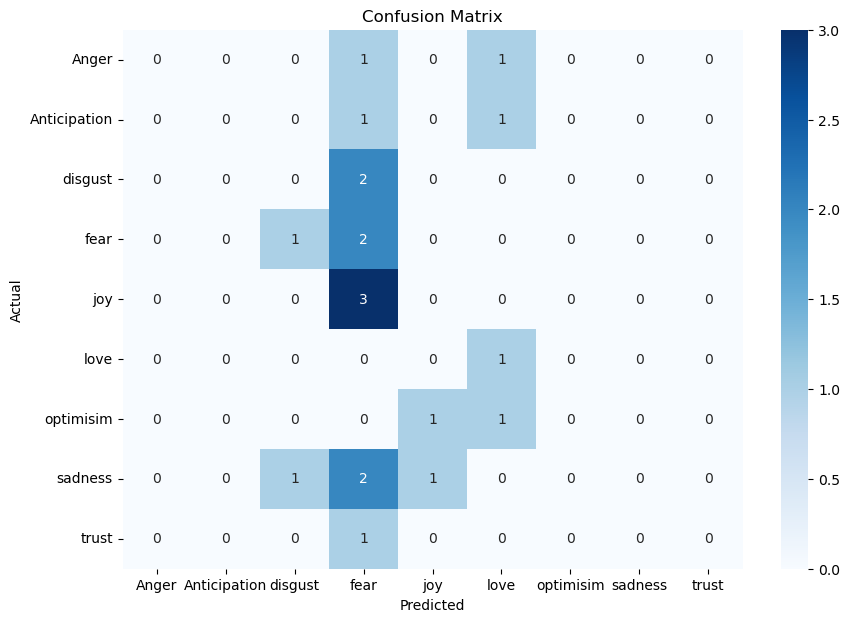

In [197]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_loaded)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Anger', 'Anticipation','disgust','fear','joy','love','optimisim','sadness','trust'], yticklabels=['Anger', 'Anticipation','disgust','fear','joy','love','optimisim','sadness','trust'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Step 8: Execute the Application Phase
## Step 8.1: Take Input from User, Preprocess it 


In [198]:
# Take user input
user_input = input("Please enter your text: ").strip()

# Preprocess the user input
def preprocess_user_input(text):
    stop_words = set(stopwords.words('english'))
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

cleaned_input = preprocess_user_input(user_input)

Please enter your text: Thanks for helping me.


In [199]:
user_input


'Thanks for helping me.'

In [200]:
cleaned_input

'thanks helping'

## Step 8.2: Load the Saved Model

In [201]:
# Load the vectorizer and the model (ensure these are the same as used during training)
vectorizer = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('naive_bayes_model.pkl')

## Step 8.3: Transform the user input using the loaded vectorizer

In [202]:


# Transform the cleaned input using the vectorizer
X_test_tfidf = vectorizer.transform([cleaned_input])  # Wrap the cleaned input in a list

# Convert the TF-IDF sparse matrix to a DataFrame
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Features DataFrame for User Input:")
print(X_test_tfidf_df)



TF-IDF Features DataFrame for User Input:
   despair  dont   im  like  love  man  sad  sadness  time  yet
0      0.0   0.0  0.0   0.0   0.0  0.0  0.0      0.0   0.0  0.0


In [203]:
# Transform the user input using the loaded vectorizer
user_input_tfidf = vectorizer.transform([cleaned_input])

## Step 8.4: Predict the sentiment of the user input

In [206]:
# Predict the sentiment of the user input
user_prediction = model.predict(X_test_tfidf_df)


# # Output the prediction
print(f"The emotion of  \"{user_input}\"  is: {user_prediction[0]}")

The emotion of  "Thanks for helping me."  is: fear


C:\Users\Haris Ellahi\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


# Step 9: Execute the Feedback Phase
## A Two-Step Process
### Step 01: After some time, take Feedback from
    o	Domain Experts and Users on deployed Titanic Passenger Survival Prediction System
### Step 02: Make a List of Possible Improvements based on Feedback received

todo gender identificaton form text

muti clas age group identification from text, emotion redectipn fronm text. mahy by personalityh type

# Step 10: Improve Model based on Feedback
### There is Always Room for Improvement
### Based on Feedback from Domain Experts and Users
    o	Improve your Model